<a href="https://colab.research.google.com/github/abaskon/Thesis/blob/main/GPR_and_DBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

In [90]:
dbi1 = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/DBI1985-2004.csv")
dbi2 = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/DBI2004-today.csv")

dbi1['Price'] = dbi1['Price'].str.replace(',', '').astype(float)
dbi2['Price'] = dbi2['Price'].str.replace(',', '').astype(float)

In [91]:
GPR = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/data_gpr_daily_recent.csv")
GPRE = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/data_gpr_export.csv")

GPR['GPRD'] = GPR['GPRD'].str.replace(',', '').astype(float)

In [92]:
dbi1['Date'] = pd.to_datetime(dbi1['Date'], format='%m/%d/%Y')
dbi2['Date'] = pd.to_datetime(dbi2['Date'], format='%m/%d/%Y')

In [93]:
GPR = GPR.rename(columns={'DAY': 'Date'})

In [94]:
GPR['Date'] = GPR['Date'].astype(str)
# Convert the 'Date' column to datetime format
GPR['Date'] = pd.to_datetime(GPR['Date'], format='%Y%m%d')

# Convert the 'Date' column to the '%m/%d/%Y' format
GPR['Date'] = GPR['Date'].dt.strftime('%Y-%m-%d')
GPR['Date'] = pd.to_datetime(GPR['Date'])


In [95]:
dbi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4999 non-null   datetime64[ns]
 1   Price     4999 non-null   float64       
 2   Open      4999 non-null   object        
 3   High      4999 non-null   object        
 4   Low       4999 non-null   object        
 5   Vol.      0 non-null      float64       
 6   Change %  4999 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 273.5+ KB


In [96]:
GPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13993 entries, 0 to 13992
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         13993 non-null  datetime64[ns]
 1   N10D         13993 non-null  int64         
 2   GPRD         13993 non-null  float64       
 3   GPRD_ACT     13993 non-null  object        
 4   GPRD_THREAT  13993 non-null  float64       
 5   date         13993 non-null  object        
 6   GPRD_MA30    13993 non-null  float64       
 7   GPRD_MA7     13993 non-null  float64       
 8   event        11 non-null     object        
 9   var_name     9 non-null      object        
 10  var_label    9 non-null      object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 1.2+ MB


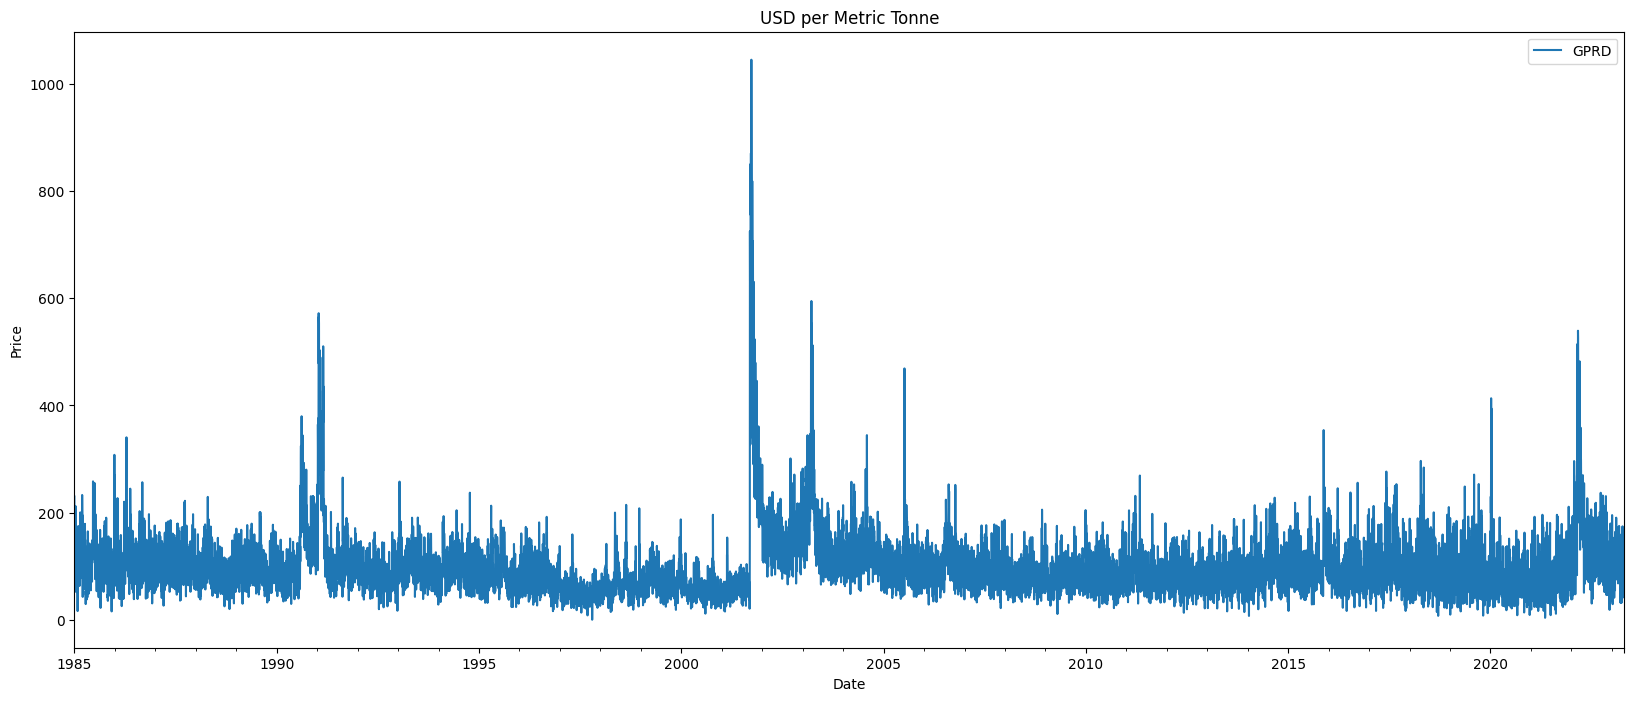

In [98]:
plotgraph(GPR,'Date','GPRD')

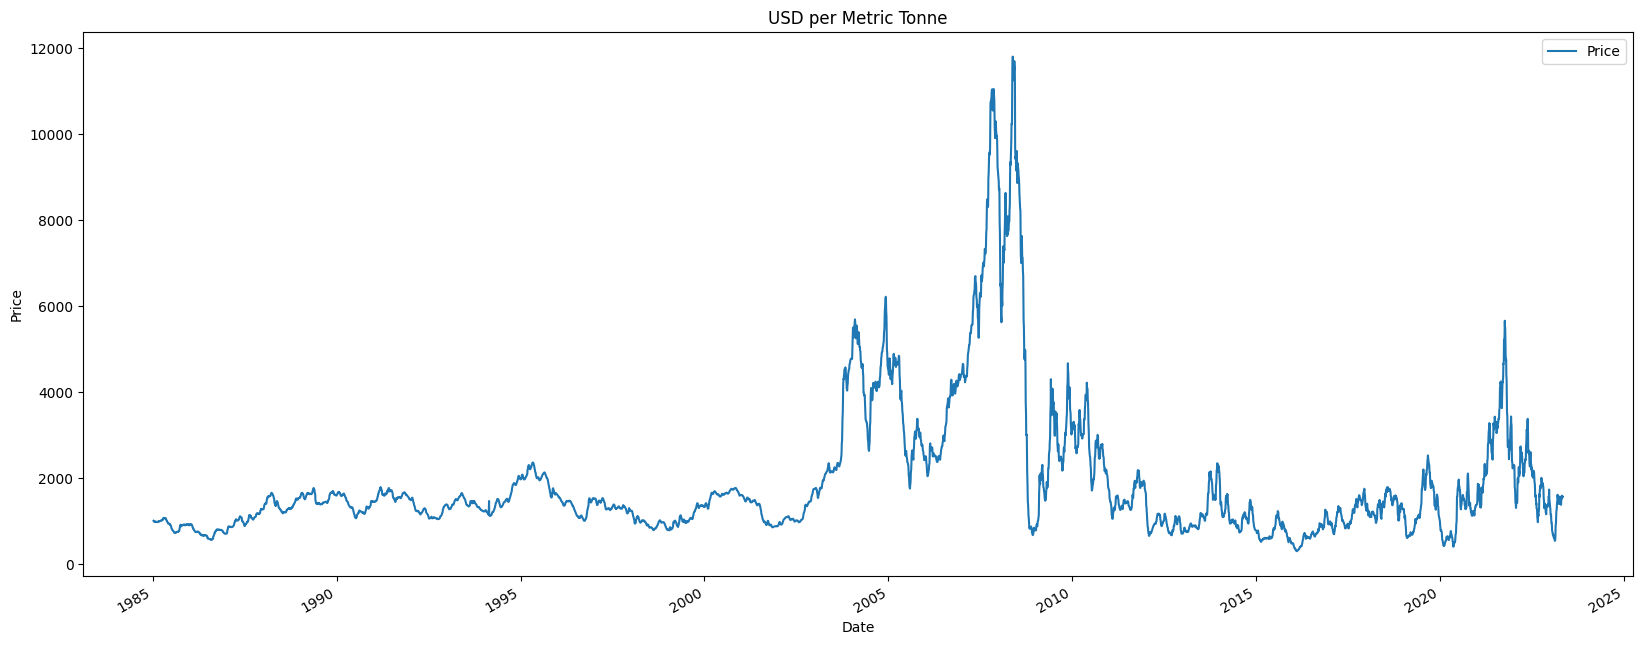

In [60]:
def plotgraph(df, x, y):
    df[y] = pd.to_numeric(df[y])
    df.plot(x=x, y=y, figsize=(20, 8))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('USD per Metric Tonne')
    plt.show()
plotgraph(DBI,'Date','Price')

In [61]:
# concatenate the two tables based on the 'date' column
DBI = pd.concat([dbi1, dbi2]).drop_duplicates(subset='Date')
DBI = DBI.sort_values(by='Date', ascending=False)

In [118]:
# Plotly line plot
fig = go.Figure(data=[go.Scatter(x=DBI['Date'], y=DBI['Price'])])
fig.show()


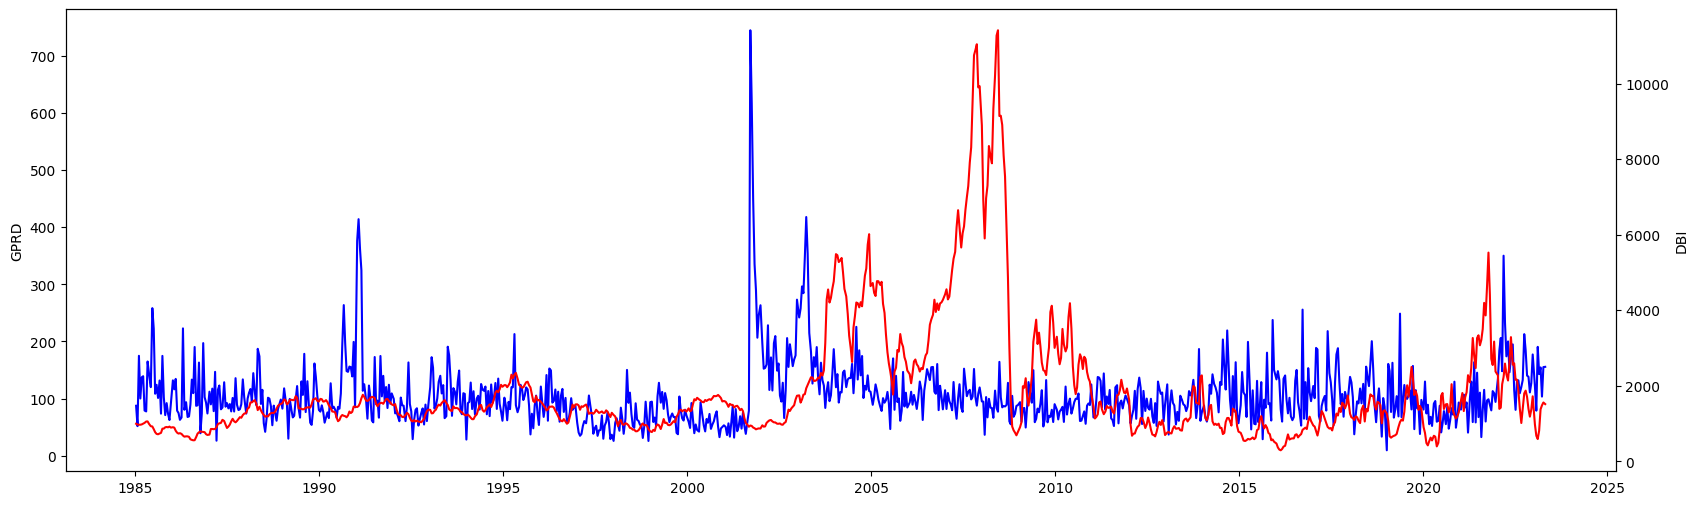

In [112]:

# Merge the two DataFrames based on the common x value
merged_df = pd.merge(DBI, GPR, on='Date')

# select every third row
merged_df = merged_df.iloc[::10, :]

import pandas as pd
import matplotlib.pyplot as plt


# create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(20, 6))

# plot the 'A' column on the first y-axis
ax1.plot(merged_df.Date, merged_df['GPRD'], color='blue')
ax1.set_ylabel('GPRD')

# create a second y-axis object
ax2 = ax1.twinx()

# plot the 'B' column on the second y-axis
ax2.plot(merged_df.Date, merged_df['Price'], color='red')
ax2.set_ylabel('DBI')

# normalize the two y-axis scales


# display the plot
plt.show()

In [113]:
merged_df

,Date,Price,Open,High,Low,Vol.,Change %,N10D,GPRD,GPRD_ACT,GPRD_THREAT,date,GPRD_MA30,GPRD_MA7,event,var_name,var_label
0,2023-04-24,1517.0,"1,517.00","1,517.00","1,517.00",NaN,0.86%,362,155.56,109.47,182.62,24-04-2023,92.71,104.91,NaN,NaN,NaN
10,2023-04-06,1560.0,"1,560.00","1,560.00","1,560.00",NaN,2.30%,427,155.16,108.27,193.52,06-04-2023,97.44,82.51,NaN,NaN,NaN
20,2023-03-23,1484.0,"1,484.00","1,484.00","1,484.00",NaN,1.92%,480,103.52,82.56,126.25,23-03-2023,115.68,96.25,NaN,NaN,NaN
30,2023-03-09,1379.0,"1,379.00","1,379.00","1,379.00",NaN,3.92%,536,154.50,86.26,215.84,09-03-2023,126.21,130.05,NaN,NaN,NaN
40,2023-02-23,816.0,816.00,816.00,816.00,NaN,21.07%,487,142.84,162.75,135.75,23-02-2023,125.36,134.08,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,1985-03-05,979.5,979.50,979.50,979.50,NaN,-0.31%,386,137.31,102.66,171.26,05-03-1985,117.59,122.75,NaN,NaN,NaN
9560,1985-02-19,971.5,971.50,971.50,971.50,NaN,-0.15%,364,100.11,72.58,136.21,19-02-1985,102.47,90.58,NaN,NaN,NaN
9570,1985-02-05,971.5,971.50,971.50,971.50,NaN,-0.21%,322,174.89,123.07,239.52,05-02-1985,97.78,103.00,NaN,NaN,NaN
9580,1985-01-22,975.5,975.50,975.50,975.50,NaN,0.00%,320,51.76,61.92,34.43,22-01-1985,113.03,84.55,NaN,NaN,NaN
